# **СИИ lab1**

ФИО: Чэнь Жохань

ИСУ: 413107

### Линейная и логистическая регрессия

#### 0. import library

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

#### 1. Датасет

In [92]:
data = pd.read_csv('California_Houses.csv')
data.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [93]:
print('Строки и столбики:', data.shape)

Строки и столбики: (20640, 14)


In [94]:
data.dtypes

Median_House_Value          float64
Median_Income               float64
Median_Age                    int64
Tot_Rooms                     int64
Tot_Bedrooms                  int64
Population                    int64
Households                    int64
Latitude                    float64
Longitude                   float64
Distance_to_coast           float64
Distance_to_LA              float64
Distance_to_SanDiego        float64
Distance_to_SanJose         float64
Distance_to_SanFrancisco    float64
dtype: object

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [96]:
data.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


Рисовать зависимость матрицы:

In [97]:
plt.style.use('default')

def correlation_matrix(table):
    
    numeric_cols = table.select_dtypes(include=[np.number]).columns
    corr_matrix = table[numeric_cols].corr().values

    plt.figure(figsize=(14, 10))
    
    im = plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
    plt.colorbar(im, label='Correlation коэф.')
    
    plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45, ha='right')
    plt.yticks(range(len(numeric_cols)), numeric_cols)
    
    for i in range(len(numeric_cols)):
        for j in range(len(numeric_cols)):
            plt.text(j, i, f'{corr_matrix[i, j]:.2f}', 
                    ha='center', va='center', 
                    color='white' if abs(corr_matrix[i, j]) > 0.5 else 'black')
    
    plt.title('Correlation matrix')
    plt.tight_layout()
    plt.show()


In [98]:
def analis_graph(series, figsize=(10, 6)):
    
    title = f"{series.name}"
    
    plt.figure(figsize=figsize)
    sorted_series = series.sort_values()
    plt.plot(sorted_series.index, sorted_series, marker='o', markersize=3, 
                linestyle='-', color='salmon', alpha=0.7)
    plt.title(f"{title}", fontsize=14)
    plt.xlabel("index", fontsize=12)
    plt.ylabel(series.name, fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    
    plt.figure(figsize=figsize)
    plt.scatter(series.index, series.values, alpha=0.6, color='purple', s=30)
    plt.title(f"{title}", fontsize=14)
    plt.xlabel("index", fontsize=12)
    plt.ylabel(series.name, fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

### 2. Предварительная обработка данных

2.1 пустое значение

In [99]:
data.isnull().any(axis=0)

Median_House_Value          False
Median_Income               False
Median_Age                  False
Tot_Rooms                   False
Tot_Bedrooms                False
Population                  False
Households                  False
Latitude                    False
Longitude                   False
Distance_to_coast           False
Distance_to_LA              False
Distance_to_SanDiego        False
Distance_to_SanJose         False
Distance_to_SanFrancisco    False
dtype: bool

Нет пустого значения, идём дальше

2.2 повторные данные

In [100]:
data.drop_duplicates()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166


тоже нет повторное строки, то мы начинаем выбрать нужное столбики.

### 2.3 Добыча и просеивание

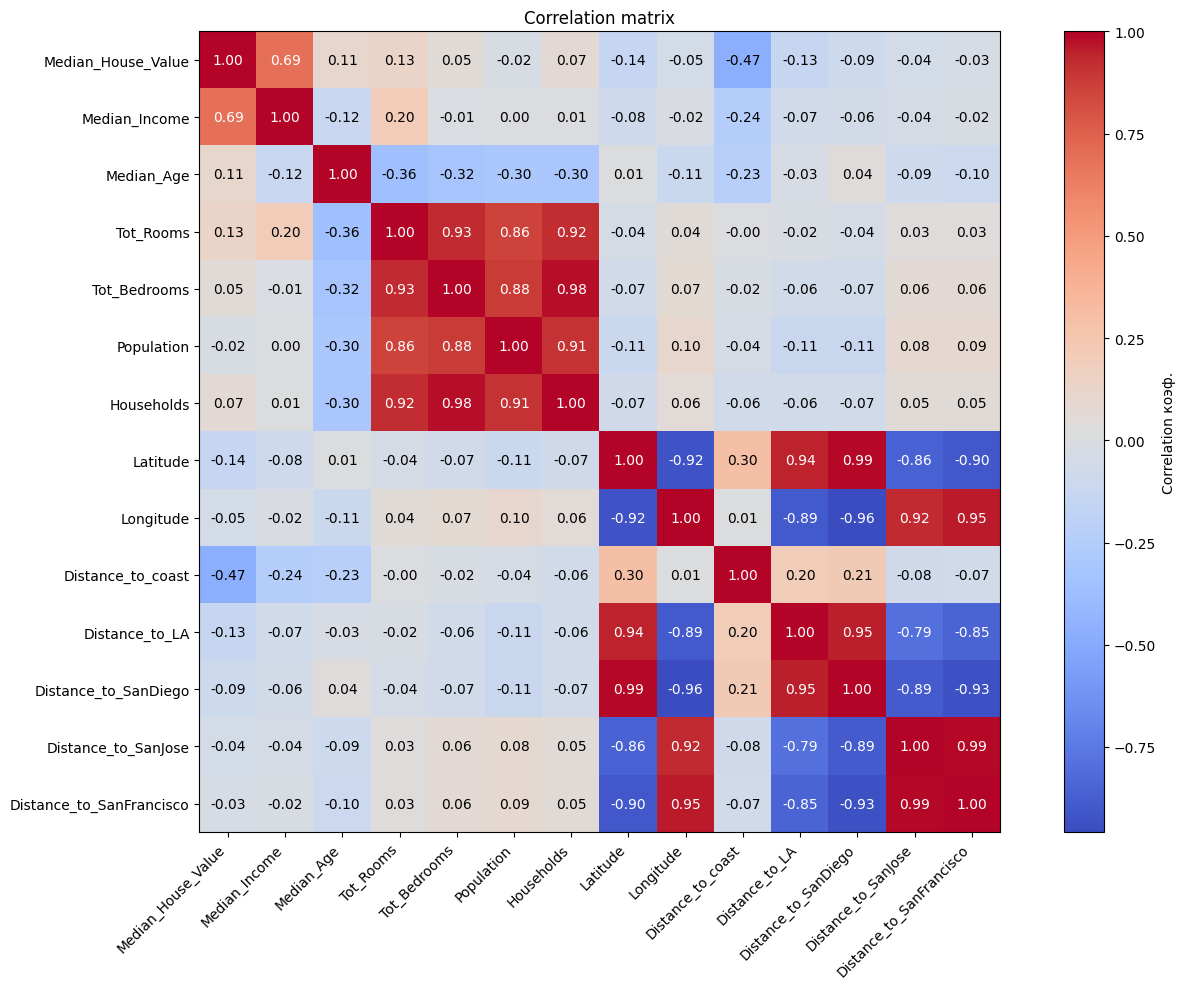

In [101]:
correlation_matrix(data)

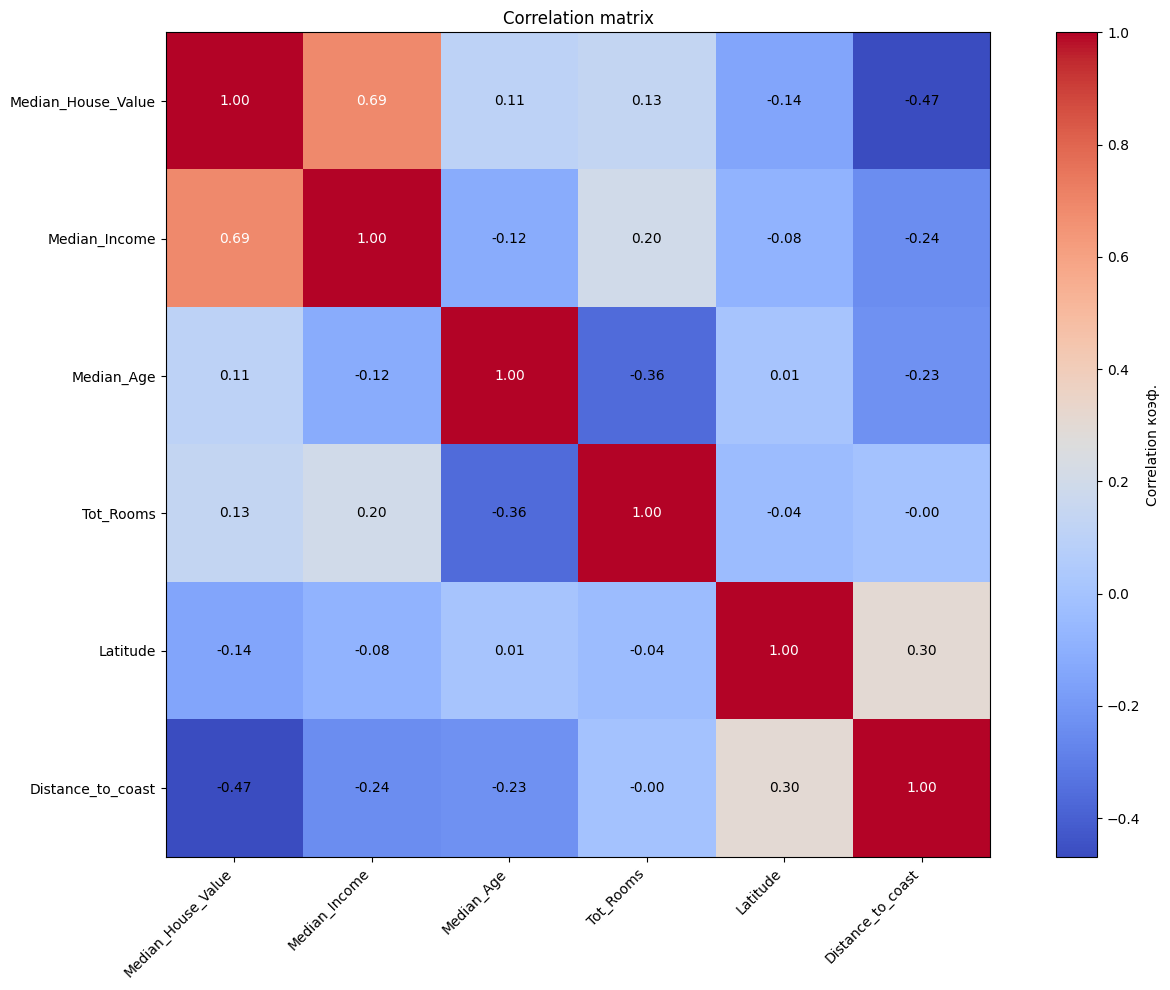

In [102]:
data_copy = data.copy()

data_copy = data_copy.drop(columns=['Tot_Bedrooms', 'Population', 'Longitude', 'Households', 'Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanFrancisco', 'Distance_to_SanJose'])

correlation_matrix(data_copy)

#### 2.4 Нормальзация данных

[0~1] нормальзация

In [103]:
def zero_one(x):
    x = (x-np.min(x))/(np.max(x)-np.min(x))
    return x

z - score нормальзация

In [104]:
def z_score(x):
    x = (x-np.mean(x))/np.std(x)
    return x

In [105]:
data_copy.head()
data_copy.to_csv('data_preprocessing.csv')

Нормальзуем каждые колонки

In [106]:
cols = ['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms', 'Latitude', 'Distance_to_coast']
data_copy_norm = data_copy.copy()
for col in cols:
    data_copy_norm[col] = z_score(data_copy[col])

cols_X = ['Median_Income', 'Median_Age', 'Tot_Rooms', 'Latitude', 'Distance_to_coast']

X = data_copy_norm[cols_X].values
y = data_copy_norm['Median_House_Value'].values.reshape(-1, 1)

### 3. Обучение модели

In [113]:
class CSVDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

train_dataset = CSVDataset(X_train, y_train)
test_dataset = CSVDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

print(len(train_loader.dataset), len(test_loader.dataset))

16512 4128
